In [49]:
# Pandas library and read_csv function to read from csv
import pandas as pd
from pandas import read_csv


# Split arrays or matrices into train and test subsets.
from sklearn.model_selection import train_test_split

# Mean absolute error regression loss.
from sklearn.metrics import mean_absolute_error

# Apply a standart scaler data
from sklearn.preprocessing import StandardScaler
# A Sequential model is appropriate for a plain stack of layers where each 
# layer has exactly one input tensor and one output tensor.
from keras import Sequential

# Dense - regular densely-connected NN layer.
# Applies Dropout to the input.
from keras.layers import Dense, Dropout

# matplotlib.pyplot is a collection of functions that
# make matplotlib work like MATLAB.
from matplotlib import pyplot as plt


In [52]:
# read data frame
df = read_csv('/content/dataset.csv')

# this data frame uses for X data
foo =pd.DataFrame(df)
foo.drop(columns=df.columns[-1], 
        axis=1, 
        inplace=True)
X = foo.iloc[:,0:].values

#features
y =df.values[:, -1]

# split to train and test dataset
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.8)

# standartization of dataset
scaler = StandardScaler()
scaler.fit(X_train_unscaled)
X_train= scaler.transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

print(X_train[:3])

[[-1.38801692 -0.58713513]
 [-1.04511529  0.16531029]
 [-0.55783565  0.84693119]]


In [61]:
# Define model
model = Sequential()
model.add(Dense(28,
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(2,)))
model.add(Dense(20,
                activation='relu',
                kernel_initializer='he_normal')) # the way to set the initial
                                                 # random weights of Keras layers.
                                                 # He normal initializer.
                                                 # It draws samples from a truncated
                                                 # normal distribution.
model.add(Dropout(0.05))
model.add(Dense(6, activation='relu'))
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics = ['acc'])
# Fit the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=6,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/100
10/10 - 2s - loss: 1.0040 - acc: 0.3051 - val_loss: 0.7211 - val_acc: 0.5630 - 2s/epoch - 242ms/step
Epoch 2/100
10/10 - 0s - loss: 0.7169 - acc: 0.5424 - val_loss: 0.5772 - val_acc: 0.8487 - 146ms/epoch - 15ms/step
Epoch 3/100
10/10 - 0s - loss: 0.5929 - acc: 0.8136 - val_loss: 0.5257 - val_acc: 0.8487 - 201ms/epoch - 20ms/step
Epoch 4/100
10/10 - 0s - loss: 0.5256 - acc: 0.7966 - val_loss: 0.5054 - val_acc: 0.7941 - 205ms/epoch - 21ms/step
Epoch 5/100
10/10 - 0s - loss: 0.4957 - acc: 0.8305 - val_loss: 0.4699 - val_acc: 0.8109 - 208ms/epoch - 21ms/step
Epoch 6/100
10/10 - 0s - loss: 0.4606 - acc: 0.8475 - val_loss: 0.4339 - val_acc: 0.8445 - 211ms/epoch - 21ms/step
Epoch 7/100
10/10 - 0s - loss: 0.4453 - acc: 0.8305 - val_loss: 0.4075 - val_acc: 0.8529 - 121ms/epoch - 12ms/step
Epoch 8/100
10/10 - 0s - loss: 0.4595 - acc: 0.8475 - val_loss: 0.3882 - val_acc: 0.8529 - 214ms/epoch - 21ms/step
Epoch 9/100
10/10 - 0s - loss: 0.4164 - acc: 0.8644 - val_loss: 0.3694 - val_acc: 

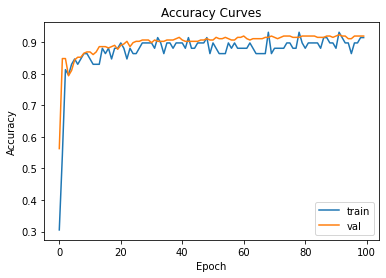

In [62]:
# plot for accuracy
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.legend()
plt.show()


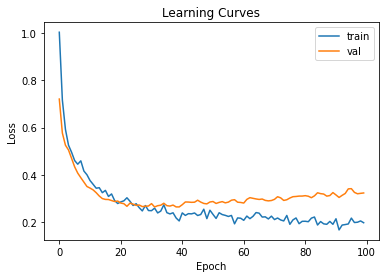

In [63]:
# plot for learning
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()